In [2]:
# Import PuLP modeler functions
from pulp import *
# Creates a list of the Suppliers
Suppliers = ["A", "B", "C", "D", "E", "F", "E"]
#Proceed to create dictionaries for all the information attached from the table of the PDF
# Dictionary for Price (€/tonne)
price = {
    "A": 49.5,
    "B": 50,
    "C": 61,
    "D": 63.5,
    "E": 66.5,
    "F": 72.5,
}
# Dictionary for Kedge/Partner
kedge_partner = {
    "A": "Kedge",
    "B": "Kedge",
    "C": "Partner",
    "D": "Kedge",
    "E": "Partner",
    "F": "Partner",
}
# Dictionary for Truck/Train
truck_train = {
    "A": "Train",
    "B": "Truck",
    "C": "Train",
    "D": "Truck",
    "E": "Truck",
    "F": "Train",
}
# Dictionary for Environmental Criterion
environmental_criterion = {
    "A": 15,
    "B": 16,
    "C": 18,
    "D": 20,
    "E": 21,
    "F": 23,
}
# Dictionary for Capacity (mt/an)
capacity = {
    "A": 300,
    "B": 600,
    "C": 510,
    "D": 655,
    "E": 575,
    "F": 450,
}
# Initialize the problem
prob = LpProblem("BatKedge_Procurement_Strategy", LpMinimize)
# Decision variables: Quantity to purchase from each supplier
quantities = LpVariable.dicts("Quantity", Suppliers, lowBound=0)
# Objective function: Minimize total cost
prob += lpSum([price[supplier] * quantities[supplier] for supplier in price]), "Total Cost"

# prob += 
# Constraint: Achieve an average environmental score of at least 19
total_environmental_score = lpSum([environmental_criterion[supplier] * quantities[supplier] for supplier in environmental_criterion])

total_quantity_purchased = lpSum([quantities[supplier] for supplier in quantities])
prob += total_environmental_score >= 19 * total_quantity_purchased, "Environmental Objective"
prob
# Constraint: At least 50% of supplies from Kedge
total_kedge_quantity = lpSum([quantities[supplier] for supplier in kedge_partner if kedge_partner[supplier] == "Kedge"])
prob += total_kedge_quantity >= 0.5 * total_quantity_purchased, "Kedge Sourcing Objective"

# Capacity constraints for each supplier
for supplier in capacity:
    prob += quantities[supplier] <= capacity[supplier], f"Capacity_{supplier}"

# Delivery method constraints (assuming given total capacities for truck and train deliveries)
# You'll need to adjust these constraints based on actual delivery method capacities
total_train_capacity = 1200  # Example capacity, adjust as needed
total_truck_capacity = 1440  # Example capacity, adjust as needed
prob += lpSum([quantities[supplier] for supplier in truck_train if truck_train[supplier] == "Train"]) <= total_train_capacity, "Train Delivery Capacity"
prob += lpSum([quantities[supplier] for supplier in truck_train if truck_train[supplier] == "Truck"]) <= total_truck_capacity, "Truck Delivery Capacity"

# Total requirement constraint
prob += total_quantity_purchased == 2450, "Total Requirement Fulfillment"

# Solve the problem
prob.solve()

results = {
    'Status': LpStatus[prob.status],
    'Total Cost': value(prob.objective),
    'Quantities': {supplier: quantities[supplier].value() for supplier in quantities},
    'Average Environmental Score': value(total_environmental_score) / value(total_quantity_purchased),
    'Percentage from Kedge': (value(total_kedge_quantity) / value(total_quantity_purchased)) * 100
}

results


{'Status': 'Optimal',
 'Total Cost': 148574.375,
 'Quantities': {'A': 300.0,
  'B': 573.75,
  'C': 260.0,
  'D': 351.25,
  'E': 515.0,
  'F': 450.0},
 'Average Environmental Score': 19.0,
 'Percentage from Kedge': 50.0}

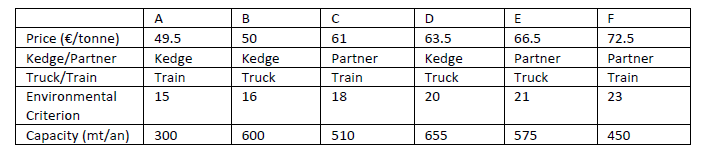